In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import heapq
from math import log
from sklearn import metrics
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from keras.models import Sequential, Model
from keras.layers import Input,Dense,Reshape,Flatten,Concatenate,Conv1D,MaxPool1D,Dropout,BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from sklearn.metrics import r2_score,mean_squared_error,precision_score,recall_score,f1_score,accuracy_score,roc_curve,auc
import matplotlib.pyplot as plt
%matplotlib inline
from keras import backend as K
from keras.layers import Activation
import os
import time
import json
import pickle
import random
import math
from decimal import Decimal
import matplotlib.mlab as mlab
from scipy import stats
from pylab import rcParams
from sklearn.utils import check_random_state
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from keras.callbacks import EarlyStopping
import seaborn as sns

In [2]:
# Core layers
from keras.layers import Activation, Dropout, Flatten, Dense, Input, LeakyReLU

# Normalization layers
from keras.layers import BatchNormalization

# Merge layers
from keras.layers import concatenate, multiply

# Embedding Layers
from keras.layers import Embedding

# Keras models
from keras.models import Model, Sequential

# Keras optimizers
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

In [3]:
data = pd.read_excel(r'D:\材料资料\参考数据.xlsx', 'Sheet2')
data

,Alloy,δ,a,VEC,σVEC,ΔHmix,ΔSmix,χ,Δχ,K,σK,Tm,σT,Phase
0,AlB12,18.807933,0.086708,3.000000,0.000000,0.000000,2.254668,2.006923,0.114582,301.230769,65.018523,2239.190000,16.833270,IM
1,B4Co,19.024498,0.090620,4.200000,2.400000,-15.360000,4.160346,2.008000,0.064000,292.000000,56.000000,2232.000000,10.394265,IM
2,AlB2,28.173786,0.102400,3.000000,0.000000,0.000000,5.291979,1.896667,0.202704,238.666667,115.022703,1876.490000,35.535273,IM
3,B6Co2Nb2,25.378555,0.102800,4.600000,2.332381,-41.440000,7.900549,1.920000,0.171581,262.000000,71.105555,2312.400000,13.560873,IM
4,HfB2,33.311805,0.107267,3.333333,0.471405,-58.666667,5.291979,1.793333,0.348839,250.000000,98.994949,2400.666667,3.102551,IM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,Al0.5CoCrCuFeNiTi2,7.308892,0.132067,7.133333,2.753584,-16.533333,15.599339,1.742000,0.153632,145.066667,32.975681,1759.254000,17.965691,SS_IM
757,CrMo0.5NbTa0.5TiZr,8.042356,0.142790,4.900000,0.830662,-4.920000,14.533432,1.592000,0.219809,131.000000,73.817342,2418.550000,18.238989,SS_IM
758,CrNbTiZr,8.781341,0.143575,4.750000,0.829156,-5.000000,11.525651,1.532500,0.124373,110.000000,67.453688,2249.900000,13.431072,SS_IM
759,CrHfNbTiZr,8.626539,0.146420,4.600000,0.800000,-4.000000,13.380867,1.486000,0.144997,110.000000,60.332413,2301.150000,12.561810,SS_IM


In [4]:
data=data.rename(columns={"δ":'$\delta$',"a":'$a$','VEC':'$VEC$',"σVEC":'${\sigma _{VEC}}$','ΔHmix':'$\Delta {H_{mix}}$','ΔSmix':'$\Delta {S_{mix}}$',
                        "χ" :'$\chi$',"Δχ":'$\Delta \chi$','K':'$K$','σK':'${\sigma _K}$','Tm':'${T_m}$','σT':'${\sigma _T}$'})
data

,Alloy,$\delta$,$a$,$VEC$,${\sigma _{VEC}}$,$\Delta {H_{mix}}$,$\Delta {S_{mix}}$,$\chi$,$\Delta \chi$,$K$,${\sigma _K}$,${T_m}$,${\sigma _T}$,Phase
0,AlB12,18.807933,0.086708,3.000000,0.000000,0.000000,2.254668,2.006923,0.114582,301.230769,65.018523,2239.190000,16.833270,IM
1,B4Co,19.024498,0.090620,4.200000,2.400000,-15.360000,4.160346,2.008000,0.064000,292.000000,56.000000,2232.000000,10.394265,IM
2,AlB2,28.173786,0.102400,3.000000,0.000000,0.000000,5.291979,1.896667,0.202704,238.666667,115.022703,1876.490000,35.535273,IM
3,B6Co2Nb2,25.378555,0.102800,4.600000,2.332381,-41.440000,7.900549,1.920000,0.171581,262.000000,71.105555,2312.400000,13.560873,IM
4,HfB2,33.311805,0.107267,3.333333,0.471405,-58.666667,5.291979,1.793333,0.348839,250.000000,98.994949,2400.666667,3.102551,IM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,Al0.5CoCrCuFeNiTi2,7.308892,0.132067,7.133333,2.753584,-16.533333,15.599339,1.742000,0.153632,145.066667,32.975681,1759.254000,17.965691,SS_IM
757,CrMo0.5NbTa0.5TiZr,8.042356,0.142790,4.900000,0.830662,-4.920000,14.533432,1.592000,0.219809,131.000000,73.817342,2418.550000,18.238989,SS_IM
758,CrNbTiZr,8.781341,0.143575,4.750000,0.829156,-5.000000,11.525651,1.532500,0.124373,110.000000,67.453688,2249.900000,13.431072,SS_IM
759,CrHfNbTiZr,8.626539,0.146420,4.600000,0.800000,-4.000000,13.380867,1.486000,0.144997,110.000000,60.332413,2301.150000,12.561810,SS_IM


In [5]:
features=data.iloc[:,1:-1]
print(features)
label=data.iloc[:,-1]

      $\delta$       $a$     $VEC$  ${\sigma _{VEC}}$  $\Delta {H_{mix}}$  \
0    18.807933  0.086708  3.000000           0.000000            0.000000   
1    19.024498  0.090620  4.200000           2.400000          -15.360000   
2    28.173786  0.102400  3.000000           0.000000            0.000000   
3    25.378555  0.102800  4.600000           2.332381          -41.440000   
4    33.311805  0.107267  3.333333           0.471405          -58.666667   
..         ...       ...       ...                ...                 ...   
756   7.308892  0.132067  7.133333           2.753584          -16.533333   
757   8.042356  0.142790  4.900000           0.830662           -4.920000   
758   8.781341  0.143575  4.750000           0.829156           -5.000000   
759   8.626539  0.146420  4.600000           0.800000           -4.000000   
760   5.041025  0.146450  4.300000           0.900000          -16.840000   

     $\Delta {S_{mix}}$    $\chi$  $\Delta \chi$         $K$  ${\sigma _K}$

In [6]:
# 将数据集拆分为训练集和测试集
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(features, label, test_size=0.15, random_state=0)

In [7]:
Features=pd.DataFrame(features)
Features

,$\delta$,$a$,$VEC$,${\sigma _{VEC}}$,$\Delta {H_{mix}}$,$\Delta {S_{mix}}$,$\chi$,$\Delta \chi$,$K$,${\sigma _K}$,${T_m}$,${\sigma _T}$
0,18.807933,0.086708,3.000000,0.000000,0.000000,2.254668,2.006923,0.114582,301.230769,65.018523,2239.190000,16.833270
1,19.024498,0.090620,4.200000,2.400000,-15.360000,4.160346,2.008000,0.064000,292.000000,56.000000,2232.000000,10.394265
2,28.173786,0.102400,3.000000,0.000000,0.000000,5.291979,1.896667,0.202704,238.666667,115.022703,1876.490000,35.535273
3,25.378555,0.102800,4.600000,2.332381,-41.440000,7.900549,1.920000,0.171581,262.000000,71.105555,2312.400000,13.560873
4,33.311805,0.107267,3.333333,0.471405,-58.666667,5.291979,1.793333,0.348839,250.000000,98.994949,2400.666667,3.102551
...,...,...,...,...,...,...,...,...,...,...,...,...
756,7.308892,0.132067,7.133333,2.753584,-16.533333,15.599339,1.742000,0.153632,145.066667,32.975681,1759.254000,17.965691
757,8.042356,0.142790,4.900000,0.830662,-4.920000,14.533432,1.592000,0.219809,131.000000,73.817342,2418.550000,18.238989
758,8.781341,0.143575,4.750000,0.829156,-5.000000,11.525651,1.532500,0.124373,110.000000,67.453688,2249.900000,13.431072
759,8.626539,0.146420,4.600000,0.800000,-4.000000,13.380867,1.486000,0.144997,110.000000,60.332413,2301.150000,12.561810


In [8]:
Features=pd.DataFrame(features)
yy=pd.DataFrame(label)
new_data=pd.concat([Features,yy],axis=1)
new_data

,$\delta$,$a$,$VEC$,${\sigma _{VEC}}$,$\Delta {H_{mix}}$,$\Delta {S_{mix}}$,$\chi$,$\Delta \chi$,$K$,${\sigma _K}$,${T_m}$,${\sigma _T}$,Phase
0,18.807933,0.086708,3.000000,0.000000,0.000000,2.254668,2.006923,0.114582,301.230769,65.018523,2239.190000,16.833270,IM
1,19.024498,0.090620,4.200000,2.400000,-15.360000,4.160346,2.008000,0.064000,292.000000,56.000000,2232.000000,10.394265,IM
2,28.173786,0.102400,3.000000,0.000000,0.000000,5.291979,1.896667,0.202704,238.666667,115.022703,1876.490000,35.535273,IM
3,25.378555,0.102800,4.600000,2.332381,-41.440000,7.900549,1.920000,0.171581,262.000000,71.105555,2312.400000,13.560873,IM
4,33.311805,0.107267,3.333333,0.471405,-58.666667,5.291979,1.793333,0.348839,250.000000,98.994949,2400.666667,3.102551,IM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,7.308892,0.132067,7.133333,2.753584,-16.533333,15.599339,1.742000,0.153632,145.066667,32.975681,1759.254000,17.965691,SS_IM
757,8.042356,0.142790,4.900000,0.830662,-4.920000,14.533432,1.592000,0.219809,131.000000,73.817342,2418.550000,18.238989,SS_IM
758,8.781341,0.143575,4.750000,0.829156,-5.000000,11.525651,1.532500,0.124373,110.000000,67.453688,2249.900000,13.431072,SS_IM
759,8.626539,0.146420,4.600000,0.800000,-4.000000,13.380867,1.486000,0.144997,110.000000,60.332413,2301.150000,12.561810,SS_IM


In [10]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=0) #调用TSNE
result_x1 = tsne.fit_transform(new_data)

# 设置画布的大小
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(tsne[:, 0], tsne[:, 1],c=new_data.Phase)
plt.subplot(122)
plt.scatter(pca[:, 0], pca[:, 1],c=new_data.Phase)
plt.colorbar()
plt.show()

D:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


ValueError: could not convert string to float: 'IM'

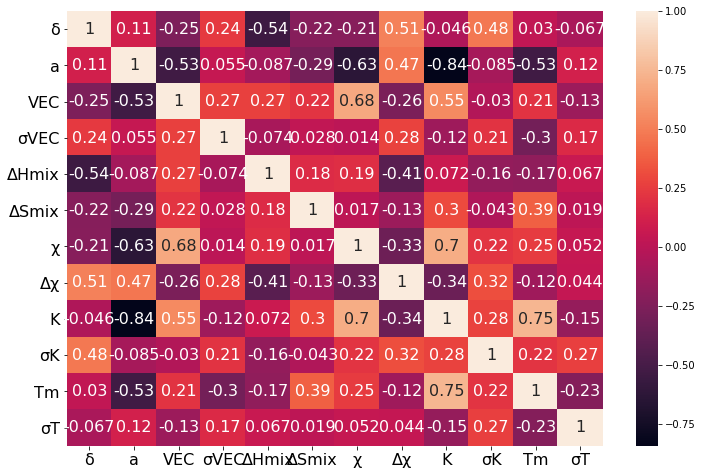

In [21]:
import seaborn as sns
plt.figure(figsize=(12, 8))
corr=X_train_full.corr()
sns.heatmap(corr,annot=True,annot_kws={"fontsize":16})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.yticks(rotation=0)
plt.savefig("pearson.png", dpi=300,format="png")
plt.show()

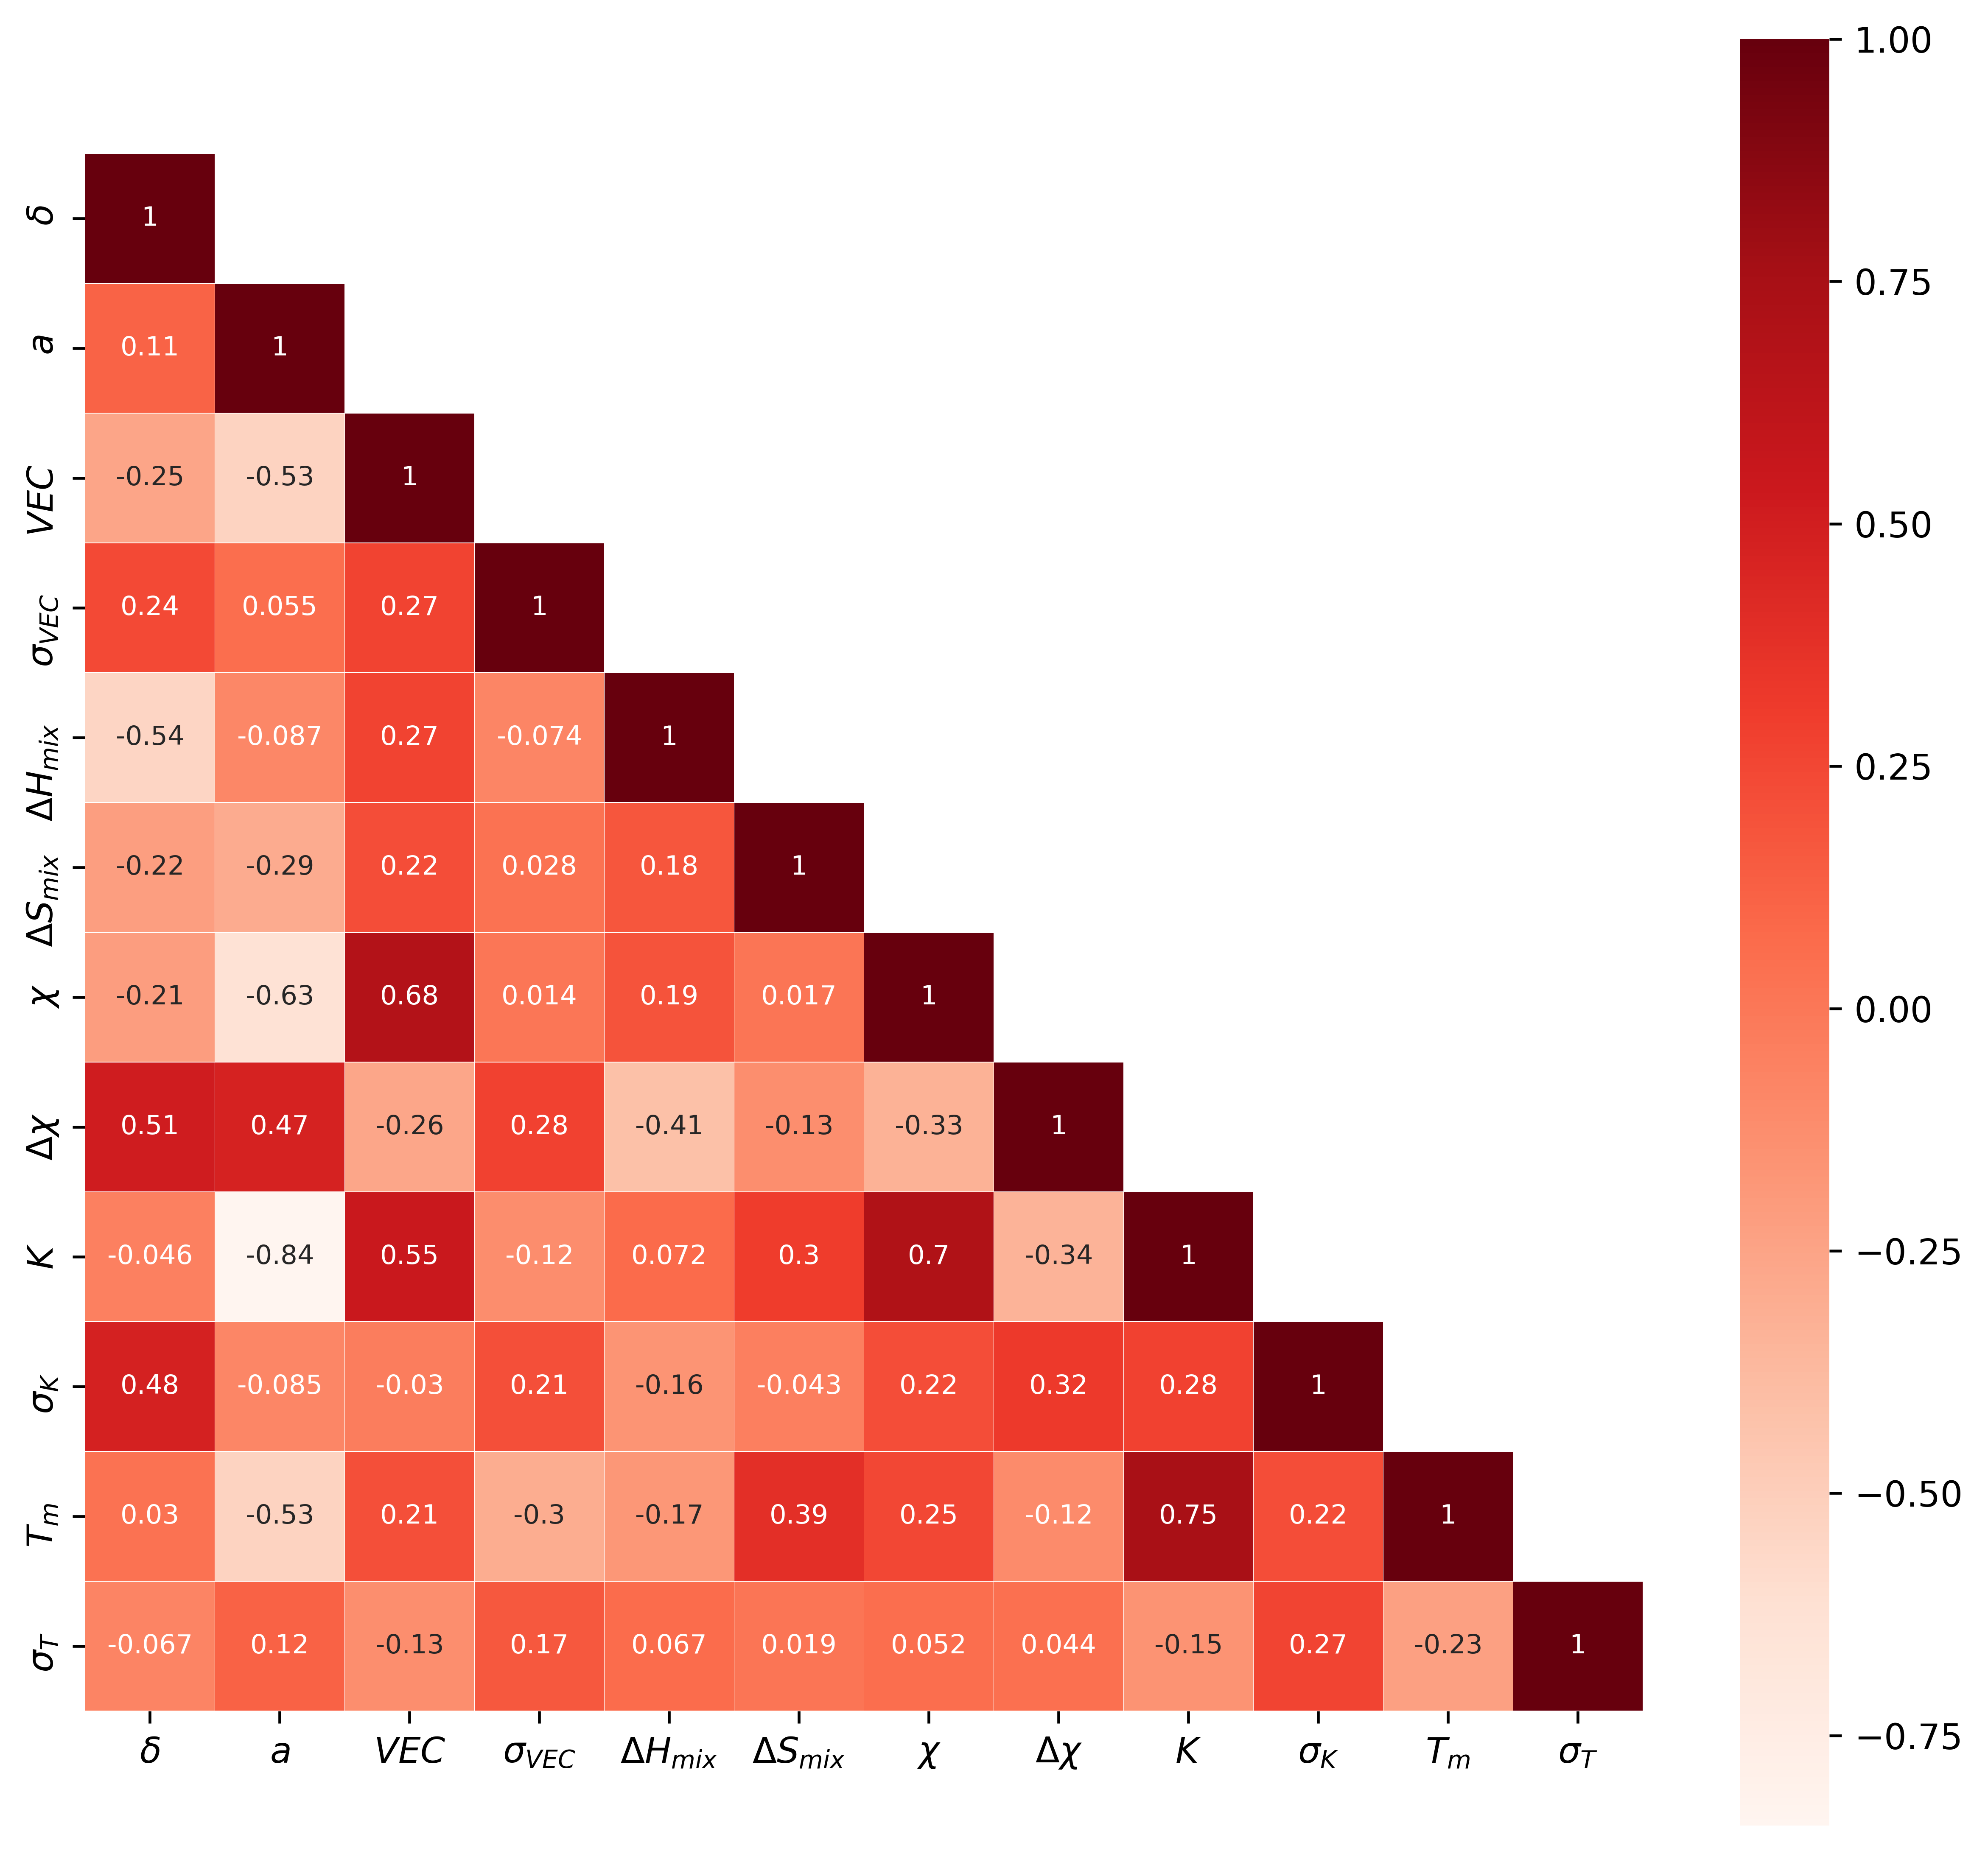

In [8]:
import palettable

plt.figure(figsize = (9,9),dpi=600)
dcorr = X_train_full.corr()
mask = np.zeros_like(dcorr)
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
for j in range(1,len(mask)):

    for i in range(0,j):

        mask[i][j] = True# 掩盖掉上面的三角形

sns.heatmap(dcorr, annot=True,mask=mask,linewidths=.05,cmap="Reds",square=True,annot_kws={'size':7.5})#显示相关性数值

plt.subplots_adjust(left=.1, right=0.95, bottom=0.22, top=1)#设置画布边缘尺寸，可以自己调整plt.save('相关性.png',dpi=300)#设置图片地址这里是相对地址，图片保存为矢量图分辨率300，

plt.show()#显示绘图内容

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_full=le.fit_transform(y_train_full)
y_test=le.transform(y_test)
print(y_test)
sc2 = MinMaxScaler()
X_train_full_sc = sc2.fit_transform(X_train_full)

[3 1 0 1 0 1 1 0 1 1 1 3 1 1 3 2 1 3 3 1 3 3 0 0 2 3 0 1 1 3 2 3 0 1 1 3 3
 1 1 2 1 0 1 1 3 0 2 1 1 1 1 1 2 2 3 1 2 3 3 3 0 3 3 3 2 1 0 3 0 3 1 3 1 2
 1 1 1 3 3 2 0 3 1 3 2 1 2 3 0 3 1 1 0 2 3 2 1 3 3 1 1 2 2 1 1 3 1 3 1 1 0
 2 0 3 1]


In [1]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPClassifier


estimator = RFC()                               # 随机森林

print("递归特征消除法和曲线图选取最优特征数量")
score = []                                                            # 建立列表
for i in range(1, 13, 1):
    selector = RFE(estimator, n_features_to_select=i,step=1)
    selector = selector.fit(X_train_full_sc,y_train_full) # 最优特征
    # 哪些特征入选最后特征，true表示入选
    print(selector.support_)
    # 每个特征的得分排名，特征得分越低（1最好），表示特征越好
    print(selector.ranking_)
    #  挑选了几个特征
    print(selector.n_features_)
    once = cross_val_score(estimator,selector.fit_transform(X_train_full_sc,y_train_full), y_train_full, cv=10).mean()                      # 交叉验证
    score.append(once)                                                           # 交叉验证结果保存到列表
print(max(score), (score.index(max(score))*1)+1)               # 输出最优分类结果和对应的特征数量
print(score)

递归特征消除法和曲线图选取最优特征数量


NameError: name 'X_train_full_sc' is not defined

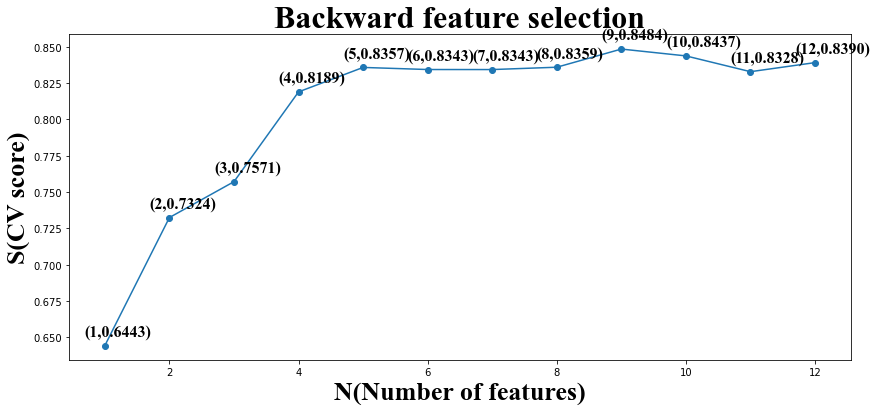

In [15]:
plt.figure(figsize=[14, 6])
plt.plot(range(1, 13, 1), score, marker='o')
plt.xlabel('N(Number of features)',fontproperties={'family':'Times New Roman'  #'serif', 
#         ,'style':'italic'
        ,'weight':'bold'  # 'normal' 
#         ,'color':'red'
        ,'size':26
       })
plt.ylabel('S(CV score)',fontproperties={'family':'Times New Roman'  #'serif', 
#         ,'style':'italic'
        ,'weight':'bold'  # 'normal' 
#         ,'color':'red'
        ,'size':26
       })
for xy in zip(range(1, 13, 1), score):
    plt.annotate("(%s,%.4f)" % xy, xy=xy, xytext=(-20, 10),textcoords='offset points',weight='bold',fontproperties={'family':'Times New Roman'  #'serif', 
#         ,'style':'italic'
        ,'weight':'bold'  # 'normal' 
#         ,'color':'red'
        ,'size':16
       })
plt.title('Backward feature selection',fontproperties={'family':'Times New Roman'  #'serif', 
#         ,'style':'italic'
        ,'weight':'bold'  # 'normal' 
#         ,'color':'red'
        ,'size':32
       })
plt.xticks(fontproperties={'family':'Times New Roman'  #'serif', 
#         ,'style':'italic'
        ,'weight':'bold'  # 'normal' 
#         ,'color':'red'
        ,'size':20
       })
plt.yticks(fontproperties={'family':'Times New Roman'  #'serif', 
#         ,'style':'italic'
        ,'weight':'bold'  # 'normal' 
#         ,'color':'red'
        ,'size':20
       })
plt.show()

In [7]:
latent_dim = 100 # dimension of the latent space
n_samples = X_train_full_sc.shape # size of our dataset
n_classes = 4
n_features = 12 

In [8]:
y_train_full
AM=0
IM=0
SS=0
SS_IM=0
for i in range(len(y_train_full)):
    if y_train_full[i]==0:
        AM=AM+1
    elif y_train_full[i]==1:
        IM=IM+1
    elif y_train_full[i]==2:
        SS=SS+1
    else:
        SS_IM=SS_IM+1
AM,IM,SS,SS_IM

(148, 203, 113, 182)

In [161]:
def build_discriminator(optimizer=Adam(0.0002, 0.5)):
    '''
    定义判别器
    
    Params:
        optimizer=Adam(0.0002, 0.5) - recommended values
    '''
    features = Input(shape=(n_features,)) #输入10维特征
    label = Input(shape=(1,), dtype='int32')
    
    # Using an Embedding layer is recommended by the papers
    label_embedding = Flatten()(Embedding(n_classes, n_features)(label))
    
    # We condition the discrimination of generated features 
    inputs = multiply([features, label_embedding])
    
    x = Dense(128)(inputs)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dense(128)(x)
    x = LeakyReLU(alpha=0.2)(x)
    #x = Dropout(0.5)(x)
    #x = Dense(128)(x)
    #x = LeakyReLU(alpha=0.2)(x)
    #x = Dropout(0.9)(x)
    
    valid = Dense(1, activation='sigmoid')(x)
    
    model = Model([features, label], valid)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()

    return model

In [162]:
def build_generator():
    '''
    定义生成器
    
    '''
    
    noise = Input(shape=(latent_dim,))  #latent_dim = 100
    label = Input(shape=(1,), dtype='int32')
    
    # Using an Embedding layer is recommended by the papers
    label_embedding = Flatten()(Embedding(n_classes, latent_dim)(label))
    
    # We condition the generation of features
    inputs = multiply([noise, label_embedding])
    
    x = Dense(128)(inputs)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Dense(256)(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Dropout(0.5)(x)
    x = Dense(256)(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Dropout(0.5)(x)
   
    
    features = Dense(n_features, activation='tanh')(x)
    
    model = Model([noise, label], features)
    model.summary()

    return model

In [163]:
def build_gan(generator, discriminator, optimizer=Adam(0.0002, 0.2)):
    '''
    定义GAN
    
    生成器的输出是判别器的输入，也是整个GAN的输出
    
    Params:
        optimizer=Adam(0.0002, 0.5) - recommended values
    '''
    
    noise = Input(shape=(latent_dim,))
    label = Input(shape=(1,))
    
    features = generator([noise, label])
    valid = discriminator([features, label])
    
    # We freeze the discriminator's layers since we're only interested in the generator and its learning
    discriminator.trainable = False
    
    model = Model([noise, label], valid)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    
    return model

In [164]:
def get_random_batch(X, y, batch_size):
    '''
    返回batch_size大小的数据
    
    Params:
        X: numpy array - features
        y: numpy array - classes
        batch_size: Int
    '''
    idx = np.random.randint(0, len(X))
    
    X_batch = X[idx:idx+batch_size]
    y_batch = y[idx:idx+batch_size]
    
    return X_batch, y_batch

In [165]:
def train_gan(gan, generator, discriminator, X, y, n_epochs=2000, batch_size=64, 
              hist_every=20, log_every=100):
    '''
    以batch_size大小的数据训练生成器和判别器
    The training goes as follow:
        1. Discriminator is trained with real features from our training data
        2. Discriminator is trained with fake features generated by the Generator
        3. GAN is trained, which will only change the Generator's weights.
        
    Params:
        gan: GAN model
        generator: Generator model
        discriminator: Discriminator model
        X: numpy array - features
        y: numpy array - classes
        n_epochs: Int
        batch_size: Int
        hist_every: Int - will save the training loss and accuracy every hist_every epochs
        log_every: Int - will output the loss and accuracy every log_every epochs
    
    Returns:
        loss_real_hist: List of Floats
        acc_real_hist: List of Floats
        loss_fake_hist: List of Floats
        acc_fake_hist: List of Floats
        loss_gan_hist: List of Floats
        acc_gan_hist: List of Floats
    '''
    
    half_batch = int(batch_size / 2)
    
    acc_real_hist = []
    acc_fake_hist = []
    acc_gan_hist = []
    loss_real_hist = []
    loss_fake_hist = []
    loss_gan_hist = []
    
    for epoch in range(n_epochs):  # n_epochs=2000
        
        X_batch, labels = get_random_batch(X, y, batch_size)  # 从数据集中选取batch_size大小的数据
        
        # train with real values
        y_real = np.ones((X_batch.shape[0], 1))  # 真实值标签为1
        loss_real, acc_real = discriminator.train_on_batch([X_batch, labels], y_real)
        
        # train with fake values
        noise = np.random.uniform(0, 1, (labels.shape[0], latent_dim)) #从均匀分布[0,1)中随机采样大小为(labels.shape[0], latent_dim)的数据
        X_fake = generator.predict([noise, labels]) #生成虚假数据
        y_fake = np.zeros((X_fake.shape[0], 1)) #虚假数据标签为0
        loss_fake, acc_fake = discriminator.train_on_batch([X_fake, labels], y_fake)
        
        for i in range(3):
            y_gan = np.ones((labels.shape[0], 1))
            loss_gan, acc_gan = gan.train_on_batch([noise, labels], y_gan)
        
        if (epoch+1) % hist_every == 0:  #每训练20次记录一下损失和精度
            acc_real_hist.append(acc_real)
            acc_fake_hist.append(acc_fake)
            acc_gan_hist.append(acc_gan)
            loss_real_hist.append(loss_real)
            loss_fake_hist.append(loss_fake)
            loss_gan_hist.append(loss_gan)

        if (epoch+1) % log_every == 0:  #每训练100次输出一下损失和精度
            lr = 'loss real: {:.3f}'.format(loss_real)
            ar = 'acc real: {:.3f}'.format(acc_real)
            lf = 'loss fake: {:.3f}'.format(loss_fake)
            af = 'acc fake: {:.3f}'.format(acc_fake)
            lg = 'loss gan: {:.3f}'.format(loss_gan)
            ag = 'acc gan: {:.3f}'.format(acc_gan)

            print('{}, {} | {}, {} | {}, {}'.format(lr, ar, lf, af, lg, ag))
        
    return loss_real_hist, acc_real_hist, loss_fake_hist, acc_fake_hist, loss_gan_hist, acc_gan_hist

In [166]:
discriminator = build_discriminator()
generator = build_generator()
gan = build_gan(generator, discriminator)

Model: "model_27"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_56 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 embedding_18 (Embedding)       (None, 1, 12)        48          ['input_56[0][0]']               
                                                                                                  
 input_55 (InputLayer)          [(None, 12)]         0           []                               
                                                                                                  
 flatten_18 (Flatten)           (None, 12)           0           ['embedding_18[0][0]']           
                                                                                           

                                                                                                  
Total params: 136,141
Trainable params: 116,508
Non-trainable params: 19,633
__________________________________________________________________________________________________


In [167]:
loss_real_hist, acc_real_hist, \
loss_fake_hist, acc_fake_hist, \
loss_gan_hist, acc_gan_hist = train_gan(gan, generator, discriminator, X_train_full_sc, y_train_full,n_epochs=3000, batch_size=32)

loss real: 0.680, acc real: 0.531 | loss fake: 0.671, acc fake: 0.688 | loss gan: 0.722, acc gan: 0.219
loss real: 0.643, acc real: 0.500 | loss fake: 0.755, acc fake: 0.625 | loss gan: 0.659, acc gan: 0.375
loss real: 0.630, acc real: 0.844 | loss fake: 0.649, acc fake: 0.656 | loss gan: 0.774, acc gan: 0.344
loss real: 0.581, acc real: 0.969 | loss fake: 0.493, acc fake: 0.625 | loss gan: 1.134, acc gan: 0.250
loss real: 0.488, acc real: 1.000 | loss fake: 0.449, acc fake: 0.531 | loss gan: 1.673, acc gan: 0.438
loss real: 0.584, acc real: 0.870 | loss fake: 0.778, acc fake: 0.261 | loss gan: 0.757, acc gan: 0.565
loss real: 0.629, acc real: 0.656 | loss fake: 0.628, acc fake: 0.750 | loss gan: 0.961, acc gan: 0.250
loss real: 0.599, acc real: 0.719 | loss fake: 0.753, acc fake: 0.750 | loss gan: 0.735, acc gan: 0.281
loss real: 0.657, acc real: 0.400 | loss fake: 0.611, acc fake: 0.760 | loss gan: 0.832, acc gan: 0.280
loss real: 0.680, acc real: 0.469 | loss fake: 0.724, acc fake: 

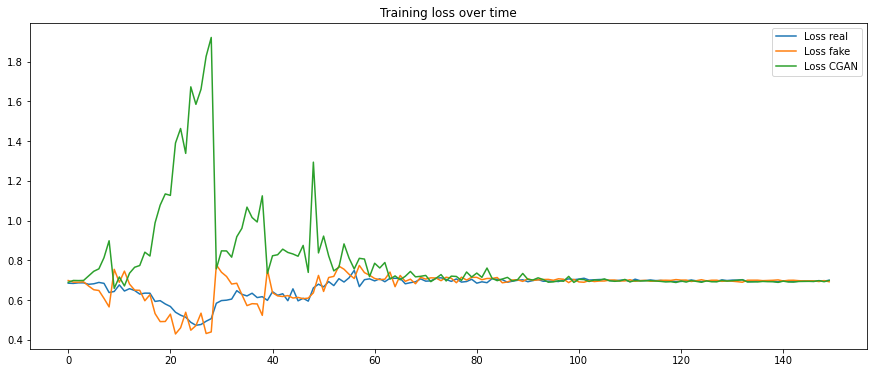

In [168]:
ax, fig = plt.subplots(figsize=(15, 6))
plt.plot(loss_real_hist)
plt.plot(loss_fake_hist)
plt.plot(loss_gan_hist)
plt.title('Training loss over time')
plt.legend(['Loss real', 'Loss fake', 'Loss CGAN'])

In [180]:
def generate_samples(class_for, n_samples=20):
    '''
    使用训练好的生成器生成特征
    
    Params:
        class_for: Int - features for this class
        n_samples: Int - how many samples to generate
    '''
    
    noise = np.random.uniform(0, 1, (n_samples, latent_dim))
    label = np.full((n_samples,), fill_value=class_for)
    return generator.predict([noise, label])

In [239]:
features_class_0 = generate_samples(0,100)
features_class_0=sc2.inverse_transform(features_class_0)
features_class_0=pd.DataFrame(features_class_0)
features_class_0.to_excel('features_class_01.xlsx')

In [240]:
features_class_1 = generate_samples(1,100)
features_class_1=sc2.inverse_transform(features_class_1)
features_class_1=pd.DataFrame(features_class_1)
features_class_1.to_excel('features_class_11.xlsx')

In [241]:
features_class_2 = generate_samples(2,100)
features_class_2=sc2.inverse_transform(features_class_2)
features_class_2=pd.DataFrame(features_class_2)
features_class_2.to_excel('features_class_21.xlsx')

In [242]:
features_class_3 = generate_samples(3,100)
features_class_3=sc2.inverse_transform(features_class_3)
features_class_3=pd.DataFrame(features_class_3)
features_class_3.to_excel('features_class_31.xlsx')

In [223]:
X_gan = np.concatenate([features_class_0,features_class_1,features_class_2,features_class_3])
y_gan = np.concatenate([np.tile(0,(features_class_0.shape[0],)),np.tile(1,(features_class_1.shape[0],)),np.tile(2,(features_class_2.shape[0],)),np.tile(3,(features_class_3.shape[0],))])
index = [i for i in range(len(X_gan))]
np.random.shuffle(index) # 打乱索引
X_gan = X_gan[index]
y_gan = y_gan[index]
X_gan_sc = sc2.transform(X_gan)
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_full_sc,y_train_full)
prob=xgb.predict_proba(X_gan_sc)
log_proba=np.log(prob)
h=log_proba*prob*(-1)
H=h[:,0]+h[:,1]+h[:,2]+h[:,3]
H=pd.DataFrame(H)
H=H.fillna(0)
H.describe()

D:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


,0
count,400.000000
mean,0.111055
std,0.180776
min,0.001193
25%,0.023711
50%,0.037664
75%,0.140036
max,1.380510


In [224]:
p=prob.sum(axis=0)/400
np.sum(p*np.log(p)*(-1))

1.3857272

# 降维

In [214]:
x_train0 = pd.read_excel('X_train - 副本.xlsx', 'AM')
x_train1 = pd.read_excel('X_train - 副本.xlsx', 'IM')
x_train2 = pd.read_excel('X_train - 副本.xlsx', 'SS')
x_train3 = pd.read_excel('X_train - 副本.xlsx', 'SS+IM')


In [215]:
font1 = {'family':'Times New Roman'  #'serif', 
#         ,'style':'italic'
        ,'weight':'bold'  # 'normal' 
#         ,'color':'red'
        ,'size':12
       }
font2 = {'family':'Times New Roman'  #'serif', 
#         ,'style':'italic'
        ,'weight':'bold'  # 'normal' 
#         ,'color':'red'
        ,'size':14
       }

In [225]:
x1=np.concatenate([x_train0,features_class_0])
y1=np.concatenate([np.tile(1,(x_train0.shape[0],)),np.tile(0,(features_class_0.shape[0],))])

x2=np.concatenate([x_train1,features_class_1])
y2=np.concatenate([np.tile(1,(x_train1.shape[0],)),np.tile(0,(features_class_1.shape[0],))])

x3=np.concatenate([x_train2,features_class_2])
y3=np.concatenate([np.tile(1,(x_train2.shape[0],)),np.tile(0,(features_class_2.shape[0],))])

x4=np.concatenate([x_train3,features_class_3])
y4=np.concatenate([np.tile(1,(x_train3.shape[0],)),np.tile(0,(features_class_3.shape[0],))])

D:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
D:\anaconda3\lib\sit

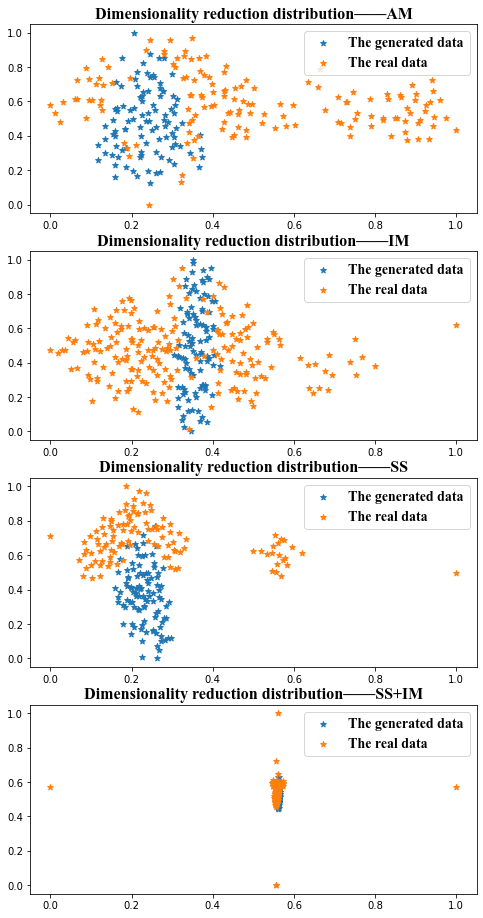

In [230]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca') #调用TSNE
result_x1 = tsne.fit_transform(x1)

tsne = TSNE(n_components=2, init='pca') #调用TSNE
result_x2 = tsne.fit_transform(x2)

tsne = TSNE(n_components=2, init='pca') #调用TSNE
result_x3 = tsne.fit_transform(x3)

tsne = TSNE(n_components=2, init='pca', random_state=0) #调用TSNE
result_x4 = tsne.fit_transform(x4)

sc = MinMaxScaler()
x1_sc = sc.fit_transform(result_x1)
x2_sc = sc.fit_transform(result_x2)
x3_sc = sc.fit_transform(result_x3)
x4_sc = sc.fit_transform(result_x4)


ax, fig = plt.subplots(figsize=(8, 16))

plt.subplot(4,1,1)
for i in range(2):
    plt.scatter(x1_sc[:, 0][np.where(y1==i)], x1_sc[:, 1][np.where(y1==i)],marker='*')
plt.xticks(fontproperties=font1)
plt.yticks(fontproperties=font1)
plt.legend(['The generated data','The real data'],loc='upper right',prop=font2)
plt.title('Dimensionality reduction distribution——AM',fontdict={'family':'Times New Roman','weight':'bold','size': 16})


plt.subplot(4,1,2)
for i in range(2):
    plt.scatter(x2_sc[:, 0][np.where(y2==i)], x2_sc[:, 1][np.where(y2==i)],marker='*')
plt.xticks(fontproperties=font1)
plt.yticks(fontproperties=font1)
plt.legend(['The generated data','The real data'],loc='upper right',prop=font2)
plt.title('Dimensionality reduction distribution——IM',fontdict={'family':'Times New Roman','weight':'bold','size': 16})


plt.subplot(4,1,3)
for i in range(2):
    plt.scatter(x3_sc[:, 0][np.where(y3==i)], x3_sc[:, 1][np.where(y3==i)],marker='*')
plt.xticks(fontproperties=font1)
plt.yticks(fontproperties=font1)
plt.legend(['The generated data','The real data'],loc='upper right',prop=font2)
plt.title('Dimensionality reduction distribution——SS',fontdict={'family':'Times New Roman','weight':'bold','size': 16})

plt.subplot(4,1,4)
for i in range(2):
    plt.scatter(x4_sc[:, 0][np.where(y4==i)], x4_sc[:, 1][np.where(y4==i)],marker='*')
plt.xticks(fontproperties=font1)
plt.yticks(fontproperties=font1)
plt.legend(['The generated data','The real data'],loc='upper right',prop=font2)
plt.title('Dimensionality reduction distribution——SS+IM',fontdict={'family':'Times New Roman','weight':'bold','size': 16})

plt.savefig("tsne.png", dpi=500,format="png")
plt.show()

In [231]:
X = np.concatenate([X_train_full,features_class_0,features_class_1,features_class_2,features_class_3])
y = np.concatenate([y_train_full,np.tile(0,(features_class_0.shape[0],)),np.tile(1,(features_class_1.shape[0],)),np.tile(2,(features_class_2.shape[0],)),np.tile(3,(features_class_3.shape[0],))])

In [232]:
index = [i for i in range(len(X))]
np.random.shuffle(index) # 打乱索引
X = X[index]
y = y[index]

In [233]:
X.shape,y.shape

((1046, 12), (1046,))

In [234]:
AM=0
IM=0
SS=0
SS_IM=0
for i in range(len(y)):
    if y[i]==0:
        AM=AM+1
    elif y[i]==1:
        IM=IM+1
    elif y[i]==2:
        SS=SS+1
    else:
        SS_IM=SS_IM+1
AM,IM,SS,SS_IM

(248, 303, 213, 282)

In [235]:
X=pd.DataFrame(X,columns=['δ','a','VEC','σVEC','ΔHmix','ΔSmix','χ','Δχ','K','σK','Tm','σT'])
y=pd.DataFrame(y,columns=['phase'])
y_test=pd.DataFrame(y_test,columns=['phase'])

In [236]:
X.to_excel('X.xlsx')
y.to_excel('y.xlsx')
X_test.to_excel('X_test.xlsx')
y_test.to_excel('y_test.xlsx')